In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null
# 런타임 다시 시작

In [2]:
# 한글 폰트 사용을 위한 설정
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [3]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유튜브_순위.csv to 유튜브_순위.csv


In [15]:
df = pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [16]:
# 구독자수 --> 구독자수 2 필드를 정수로 만들기
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [8]:
x = '64,300'
int(x.replace(',',''))

64300

In [12]:
def str2int(x):
  return int(x.replace(',',''))

In [17]:
df['비디오수2'] = df.비디오수.apply(str2int) 
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


- 비디오수 Top20 (채널명, 비디오수) 막대 그래프

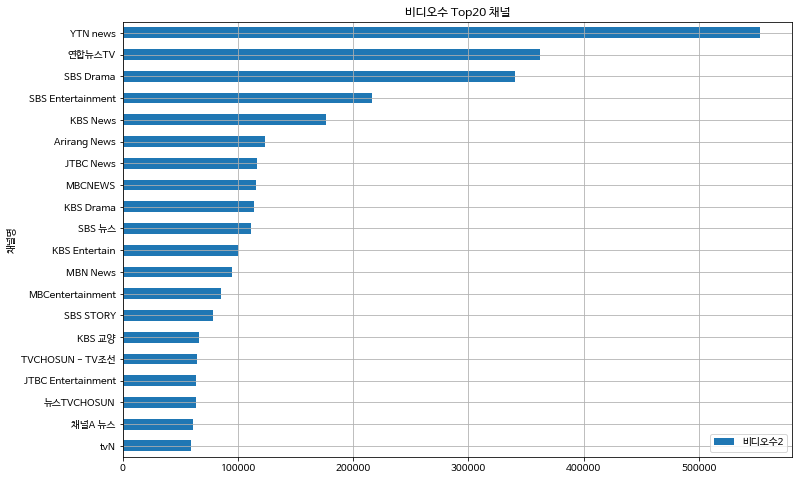

In [65]:
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('비디오수 Top20 채널')
plt.show()

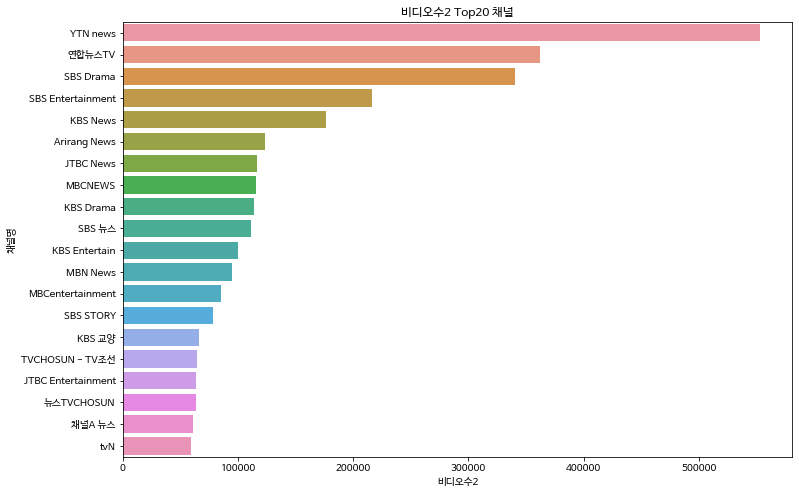

In [70]:
import seaborn as sns
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='비디오수2', data=df2.head(20))
plt.title('비디오수2 Top20 채널')
plt.show()

- 조회수 기준 Top20 채널

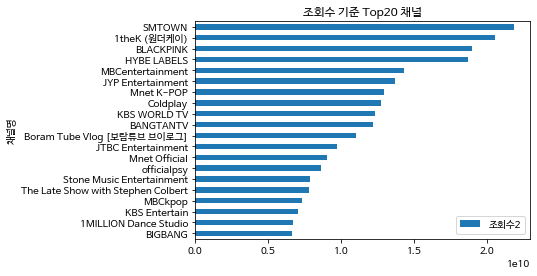

In [83]:
df['조회수2'] = df.조회수.apply(str2int)
df3 = df[['채널명', '조회수2']].sort_values(by='조회수2', ascending=False)
df3.set_index('채널명', inplace=True)
df3.head(20).sort_values('조회수2').plot(kind='barh')
plt.title('조회수 기준 Top20 채널')
plt.show()

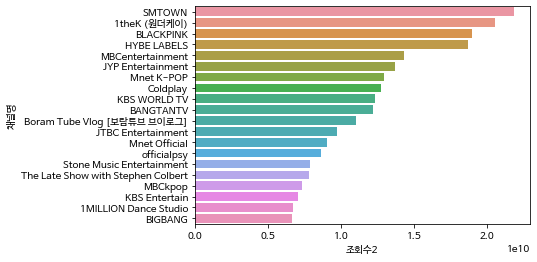

In [84]:
df3 = df[['채널명', '조회수2']].sort_values(by='조회수2', ascending=False)
sns.barplot(y='채널명', x='조회수2', data=df3.head(20))
plt.show()

- 카테고리별 수 분포

In [90]:
df.카테고리.value_counts().to_frame()

,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


In [91]:
df[['카테고리', '구독자수2']].groupby('카테고리').count()

,구독자수2
카테고리,
BJ/인물/연예인,71
IT/기술/컴퓨터,8
TV/방송,146
게임,74
교육/강의,22
국내/해외/여행,4
뉴스/정치/사회,53
미분류,114
스포츠/운동,8


ValueError: ignored

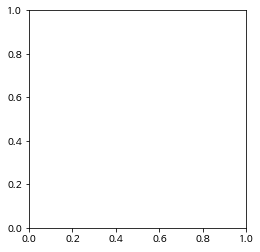

In [98]:
df3 = df['카테고리'].value_counts().to_frame()

plt.figure()

- 카테고리별 구독수 합계 시각화

In [109]:
df4 = df[['카테고리','구독자수2']].groupby('카테고리').agg(['count', 'sum'])
df4.columns = ['채널수', '구독자수_합계']
df4.sort_values(by='구독자수_합계', ascending=False, inplace=True)
df4.reset_index(inplace=True)
df4

,카테고리,채널수,구독자수_합계
0,음악/댄스/가수,171,674180000
1,키즈/어린이,88,257740000
2,TV/방송,146,229720000
3,음식/요리/레시피,85,180570000
4,미분류,114,143340000
5,BJ/인물/연예인,71,97560000
6,뉴스/정치/사회,53,71020000
7,게임,74,67170000
8,취미/라이프,38,47890000
9,패션/미용,44,44370000


In [124]:
df4.plot(kind='barh', y=df4.index, x='구독자수_합계')
plt.title('카테고리별 구독자수 합계')
plt.show()

KeyError: ignored